In [12]:
import wandb
import torch
wandb.util.generate_id()

'dqfpf58t'

In [181]:
import yaml
print(yaml.dump(config))

!!python/object:ai.train.TrainNNConfig
base_output_dir: /mnt/ssd3/user/spock/projects/AI/experiments
datamodule: !!python/object:ai.datamodule.text.Config
  _target_: ai.datamodule.text.TextDataModule
  batch_size: 32
  block_size: 256
  fname: /mnt/ssd3/user/spock/projects/AI/data/shakespeare.txt
  num_workers: 0
early_stopping:
  min_delta: 0.0
  mode: min
  monitor: val/loss
  patience: 25
  verbose: true
experiment_group: next_token
fit_ckpt_path: /mnt/ssd3/user/spock/projects/AI/experiments/next_token/Transformer/v5//checkpoints/epoch0__step7250.ckpt
lightning_module: !!python/object:ai.lightning_modules.next_token.Config
  _target_: ai.lightning_modules.next_token.NextToken
  model: !!python/object:ai.models.nlp.transformer.Config
    block_size: 256
    dropout: 0.2
    n_blocks: 4
    n_embd: 256
    n_heads: 4
    vocab_size: 65
  optimizer_class: torch.optim.AdamW
  optimizer_init_params:
    lr: 0.0002
  scheduler_class: null
  scheduler_init_params: null
  scheduler_lightni

In [90]:
!ls /mnt/ssd3/user/spock/projects/AI/experiments/next_token/Transformer/v4/checkpoints

epoch0__step200.ckpt


In [95]:
import fsspec
fs = fsspec.open(config.output_dir)

In [98]:
z = torch.load('/mnt/ssd3/user/spock/projects/AI/experiments/next_token/Transformer/v4/checkpoints/epoch0__step200.ckpt')
z['optimizer_states'][0]['param_groups']

In [93]:
from ai.train import TrainNNConfig
%load_ext autoreload
%autoreload 2
config = TrainNNConfig.from_yaml_file('/mnt/ssd3/user/spock/projects/AI/experiments/next_token/WaveNet/shuffle_v2/train.config')
config = TrainNNConfig.from_yaml_file('/mnt/ssd3/user/spock/projects/AI/experiments/next_token/SimpleLSTM/v1/train.config')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
!ls /mnt/ssd3/user/spock/projects/AI/experiments/next_token/Transformer/v5//checkpoints/epoch0__step7000.ckpt

ls: cannot access '/mnt/ssd3/user/spock/projects/AI/experiments/next_token/Transformer/v5//checkpoints/epoch0__step7000.ckpt': No such file or directory


In [172]:
from ai.train import TrainNNConfig
import torch

config = TrainNNConfig.from_yaml_file('/mnt/ssd3/user/spock/projects/AI/experiments/next_token/Transformer/v5/train.config')
dm = config.datamodule.i()
dm.prepare_data()
model_class = config.lightning_module.get_target()
model = model_class.load_from_checkpoint('/mnt/ssd3/user/spock/projects/AI/experiments/next_token/Transformer/v5//checkpoints/epoch0__step7000-v1.ckpt')
x,y = next(iter(dm.train_dataloader()))
model = model.to('cpu')
model.eval()
with torch.inference_mode():
    y_hat = model(x)
    y_hat.shape

# dm.train_dataloader.dat
# g = model.generate(x[:2], 1000)
# print(''.join(dm.ds_train.decode(g[0])))

2023-11-25 22:20:03.748 | INFO     | ai.datamodule.text:prepare_data:76 - Creating datasets...


In [175]:
# model.eval

In [176]:
# head = block.mha.heads[-2]

# head.last_attn_map.sum(-1)
# head.last_attn_map.shape#.sum()

/tmp/ipykernel_3670387/2753359079.py:11: RuntimeWarning: divide by zero encountered in log
  ax.imshow(np.log(head.last_attn_map[0])) # 0 is first element in batch


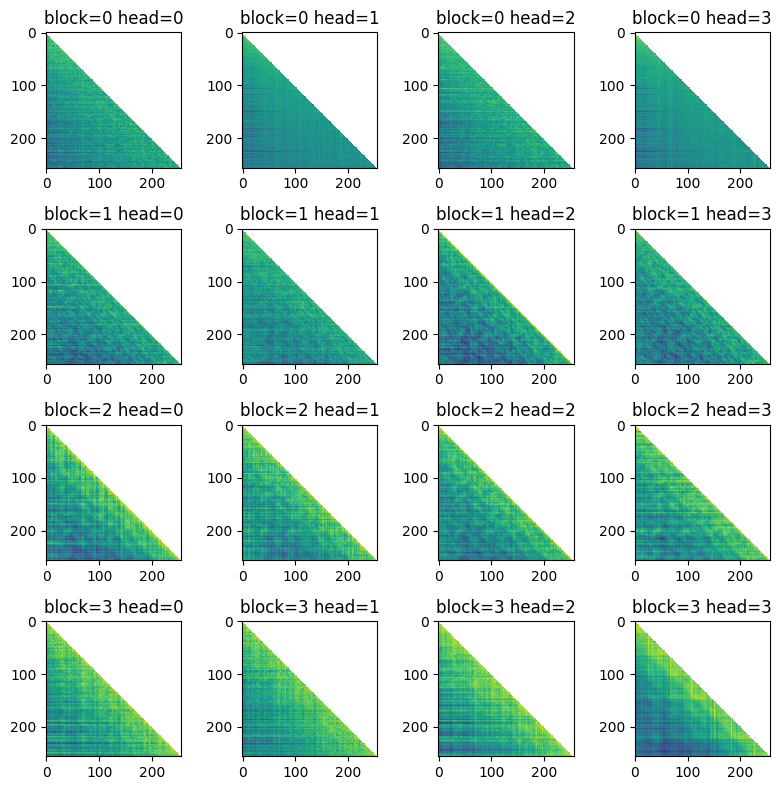

In [177]:
import numpy as np
n_blocks = len(model.model.blocks)
n_heads = len(block.mha.heads)
fig, axes = plt.subplots(n_blocks, n_heads, figsize=(8,8))

for i in range(n_blocks):
    for j in range(n_heads):
        ax = axes[i,j]
        block = model.model.blocks[i]
        head = block.mha.heads[j]
        ax.imshow(np.log(head.last_attn_map[0])) # 0 is first element in batch
        ax.set_title(f'block={i} head={j}')
fig.tight_layout()
# list(block.named_parameters())

In [84]:
print(torch.backends.cuda.flash_sdp_enabled())
# True
print(torch.backends.cuda.mem_efficient_sdp_enabled())
# True
print(torch.backends.cuda.math_sdp_enabled())

True
True
True


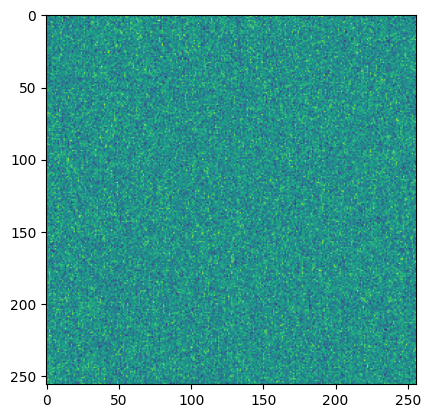

In [83]:
import matplotlib.pyplot as plt
plt.imshow(model.model.position_embedding_table.weight.detach().numpy())